<a href="https://colab.research.google.com/github/penguinprogramer/Clasify-digits/blob/master/classify_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# first firls we have to load  the images
------------------


Download images 

i created this datasel myself by writing a whole load of numbers down on paper. 
after that i scanned them in usuing a flatbed scanner

then i used imagemagick to preprocess the images 

while it would have been al lit quicker to use a pre-existing dataset such as mnist, i thought it would be fun to create one from scratch

In [0]:
!curl -O https://fadedace-gci.web.app/monodigits.zip
!unzip monodigits.zip
! rm digits/26.png
! rm digits/33.png
! rm digits/a.png
! rm digits/split.rb # here i an removing left over bits that i used when separating up he image and preprocessing them

# Import required Packages


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
from keras.preprocessing import image
from tensorflow.keras import layers

import matplotlib.pylab as plt

import tensorflow as tf
#tf.enable_eager_execution()

import numpy as np
import IPython.display as display
from PIL import Image

import pathlib
data_dir = pathlib.Path("/content/digits")


Using TensorFlow backend.


lets get familiar with the dataset

In [0]:
image_count = len(list(data_dir.glob('*/*.png')))
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])


In [4]:
print(image_count)

print(CLASS_NAMES ) #lets briefly check we have a class for each didgit

2669
['5' '1' '7' '9' '2' '4' '3' '0' '6' '8']


In [5]:
zero = list(data_dir.glob('0/*'))

for image_path in zero[:3]:
    display.display(Image.open(str(image_path)))  #lets have a look at a few of our images

In [0]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
                                                                  
                                                                  validation_split=0.2
                                                                  )
BATCH_SIZE = 10
IMG_HEIGHT = 30 # the images are 30x30 px
IMG_WIDTH = 30
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [7]:

train_generator = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True, #this is important as the model may not generalise well if it learns the order of thetraining data 
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES),

    subset='training') # set as training data

validation_generator = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES),
    subset='validation') # set as validation data

Found 2142 images belonging to 10 classes.
Found 527 images belonging to 10 classes.


In [8]:
train_generator.image_shape

(30, 30, 3)

In [9]:
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)



 #lets set up the model
model =tf.keras.Sequential()
model.add(layers.Conv2D(30, (3, 3), activation='relu', input_shape=IMG_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(10)) # since there are 10 output classes


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
base_learning_rate = 0.001
model.compile(
  loss='mean_squared_error', optimizer='sgd', #this is one of the simplest loss functios and optimisers but it works well enough for our purposes
  metrics=['accuracy'])


In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 30)        840       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        17344     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                6

In [12]:
EPOCHS = 200 # with around 100 epocs i got an accuracy of about 90%
history = model.fit_generator(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH ,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=200 // BATCH_SIZE
)

Epoch 1/200
267/267 [==============================] - 7s 25ms/step - loss: 0.0931 - acc: 0.0882 - val_loss: 0.0903 - val_acc: 0.0800
Epoch 2/200
267/267 [==============================] - 3s 12ms/step - loss: 0.0897 - acc: 0.1097 - val_loss: 0.0897 - val_acc: 0.1350
Epoch 3/200
267/267 [==============================] - 3s 12ms/step - loss: 0.0892 - acc: 0.1754 - val_loss: 0.0894 - val_acc: 0.1200
Epoch 4/200
267/267 [==============================] - 3s 12ms/step - loss: 0.0887 - acc: 0.1995 - val_loss: 0.0888 - val_acc: 0.1200
Epoch 5/200
267/267 [==============================] - 3s 12ms/step - loss: 0.0881 - acc: 0.2434 - val_loss: 0.0884 - val_acc: 0.2450
Epoch 6/200
267/267 [==============================] - 3s 12ms/step - loss: 0.0876 - acc: 0.2693 - val_loss: 0.0880 - val_acc: 0.1950
Epoch 7/200
267/267 [==============================] - 3s 12ms/step - loss: 0.0869 - acc: 0.2849 - val_loss: 0.0874 - val_acc: 0.2850
Epoch 8/200
267/267 [==============================] - 3s 12ms

# Lets see how we did


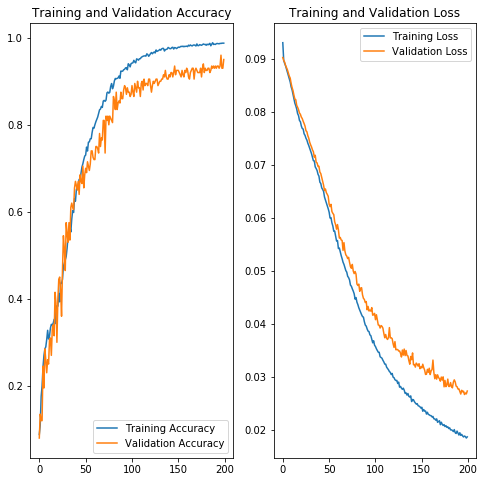

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

As shown by the graph there is not much of an improvement after 150 *epochs*

# What were the failure cases
here i am displaying a small sample of the cases where there was a mis classification

In [14]:
from keras.preprocessing import image
for i in range(140):

  img = image.load_img('/content/digits/4/crdigit'+str(600+i)+'.png', target_size=(30, 30))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict_classes(images, batch_size=1)

  if (CLASS_NAMES[classes[0]] !='4'):
        display.display(Image.open('/content/digits/4/crdigit'+str(600+i)+'.png'))
        print(CLASS_NAMES[classes[0]])
  


6


# Save model

In [0]:

model.save('clasifyDigits.h5') 

